# 📊 Synthetic Energy Data Visualization (v2)
This notebook visualizes synthetic energy and carbon footprint data generated using the V2 generator.

- Supports anomaly flags
- Visualizes daily trends and anomalies by sector


In [14]:
# === Imports ===
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

sns.set(style="whitegrid")


In [15]:
from utils.loader import load_synthetic_dataset

res = load_synthetic_dataset("synthetic_energy_residential_365d.csv")
com = load_synthetic_dataset("synthetic_energy_commercial_365d.csv")
mix = load_synthetic_dataset("synthetic_energy_mixed_365d.csv")

# Optional: combine
combined = pd.concat([res, com, mix], ignore_index=True)
combined['date'] = combined['timestamp'].dt.date


C:\Users\Mantas\AppData\Local\Temp\ipykernel_30840\1276484684.py:10: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\Mantas\anaconda3\envs\energy_env\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


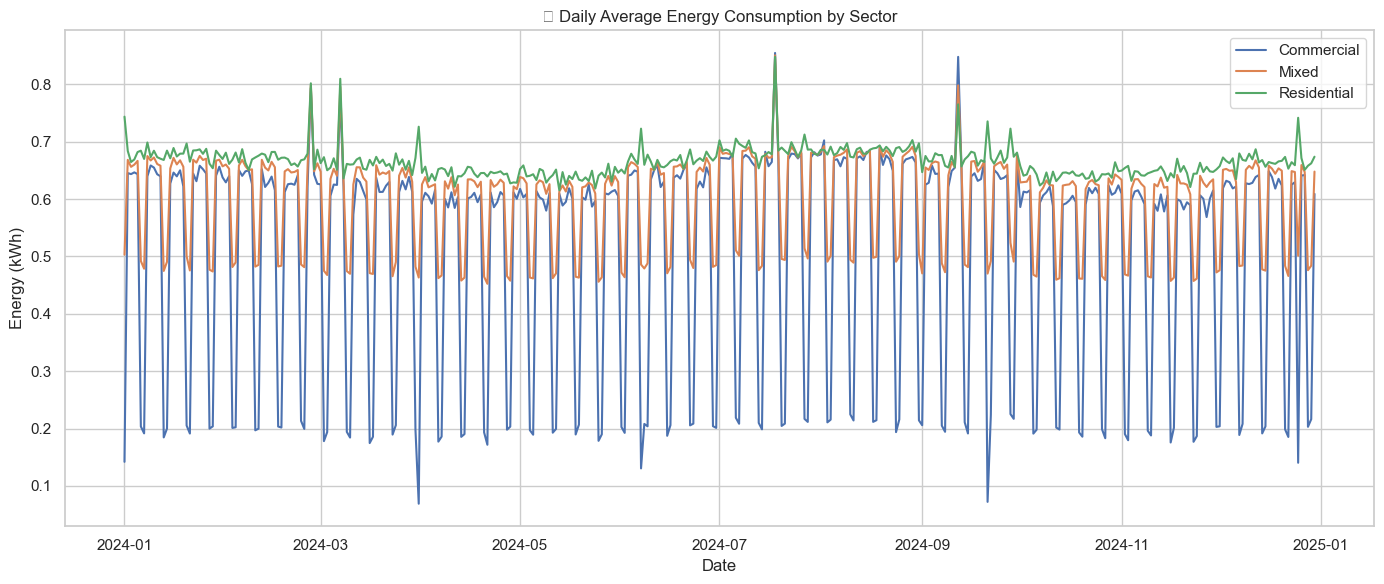

In [16]:
# === Plot Daily Energy with Anomalies ===
plt.figure(figsize=(14, 6))
for label, group in combined.groupby('sector'):
    group_daily = group.groupby('date')['energy_kWh'].mean()
    plt.plot(group_daily.index, group_daily.values, label=label)
plt.title("📈 Daily Average Energy Consumption by Sector")
plt.xlabel("Date")
plt.ylabel("Energy (kWh)")
plt.legend()
plt.tight_layout()
plt.show()


C:\Users\Mantas\AppData\Local\Temp\ipykernel_30840\4199425608.py:12: UserWarning: Glyph 9888 (\N{WARNING SIGN}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Mantas\AppData\Local\Temp\ipykernel_30840\4199425608.py:12: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\Mantas\anaconda3\envs\energy_env\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9888 (\N{WARNING SIGN}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Mantas\anaconda3\envs\energy_env\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


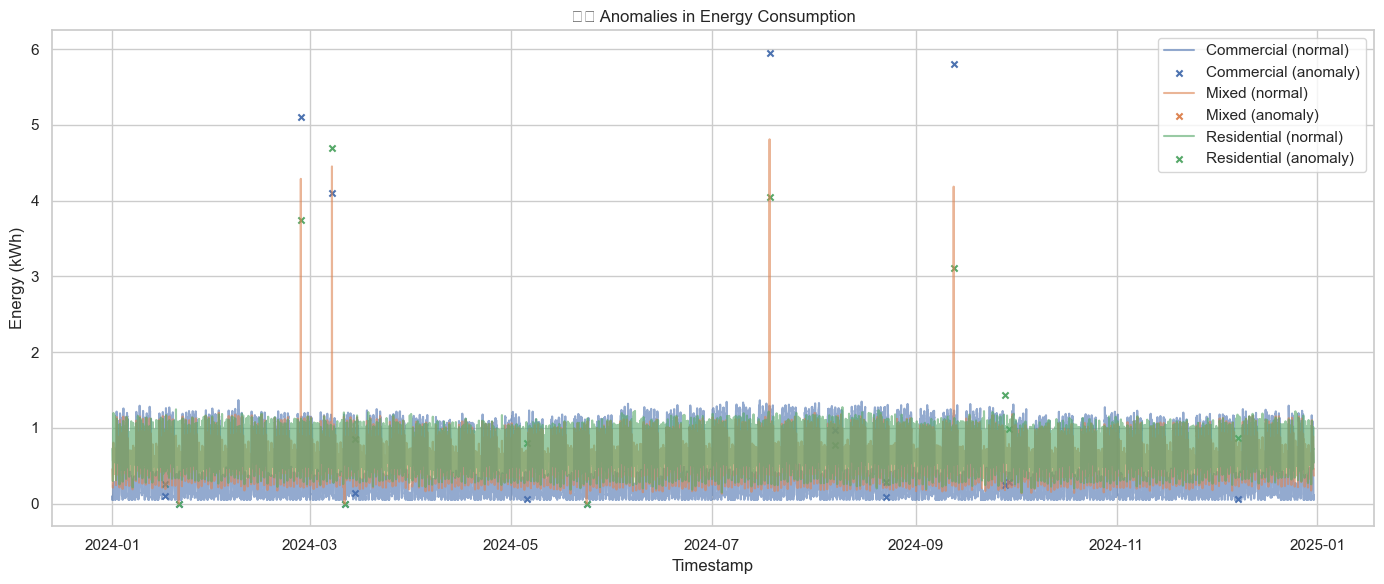

In [17]:
# === Visualize Anomalies (flagged points) ===
plt.figure(figsize=(14, 6))
for label, group in combined.groupby('sector'):
    normal = group[group['anomaly_flag'] == 0]
    anomaly = group[group['anomaly_flag'] == 1]
    plt.plot(normal['timestamp'], normal['energy_kWh'], label=f"{label} (normal)", alpha=0.6)
    plt.scatter(anomaly['timestamp'], anomaly['energy_kWh'], label=f"{label} (anomaly)", s=20, marker='x')
plt.title("⚠️ Anomalies in Energy Consumption")
plt.xlabel("Timestamp")
plt.ylabel("Energy (kWh)")
plt.legend()
plt.tight_layout()
plt.show()


Hourly Usage Profile (Mean per Hour of Day)

C:\Users\Mantas\AppData\Local\Temp\ipykernel_30840\3593200303.py:11: UserWarning: Glyph 128257 (\N{CLOCKWISE RIGHTWARDS AND LEFTWARDS OPEN CIRCLE ARROWS}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\Mantas\anaconda3\envs\energy_env\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128257 (\N{CLOCKWISE RIGHTWARDS AND LEFTWARDS OPEN CIRCLE ARROWS}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


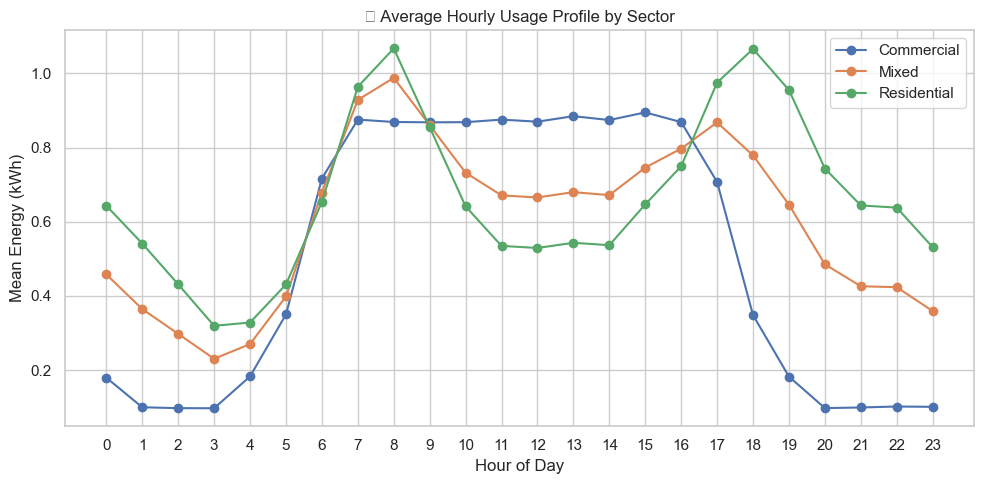

In [18]:
plt.figure(figsize=(10, 5))
for label, group in combined.groupby("sector"):
    hourly = group.groupby(group['timestamp'].dt.hour)["energy_kWh"].mean()
    plt.plot(hourly.index, hourly.values, label=label, marker='o')
plt.xticks(range(24))
plt.xlabel("Hour of Day")
plt.ylabel("Mean Energy (kWh)")
plt.title("🔁 Average Hourly Usage Profile by Sector")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Boxplot: Energy Distribution by Sector

C:\Users\Mantas\AppData\Local\Temp\ipykernel_30840\1353402721.py:7: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\Mantas\anaconda3\envs\energy_env\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


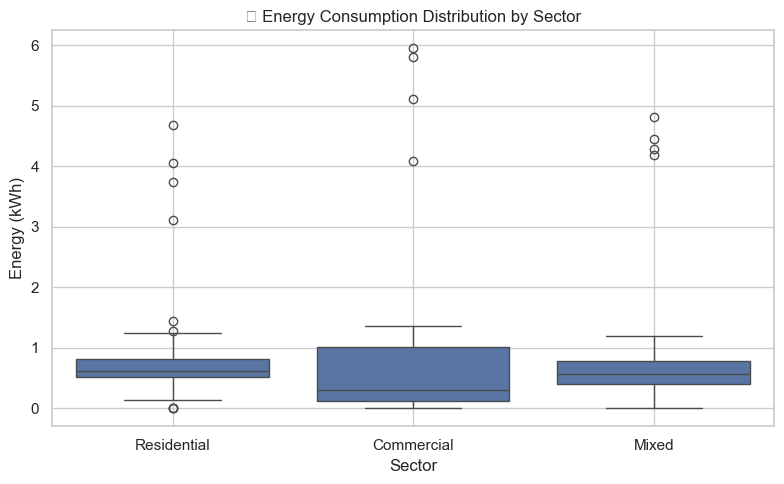

In [19]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=combined, x="sector", y="energy_kWh")
plt.title("📦 Energy Consumption Distribution by Sector")
plt.ylabel("Energy (kWh)")
plt.xlabel("Sector")
plt.grid(True)
plt.tight_layout()
plt.show()


Anomaly Counts per Sector

C:\Users\Mantas\AppData\Local\Temp\ipykernel_30840\2046015771.py:5: UserWarning: Glyph 9888 (\N{WARNING SIGN}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Mantas\AppData\Local\Temp\ipykernel_30840\2046015771.py:5: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\Mantas\anaconda3\envs\energy_env\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9888 (\N{WARNING SIGN}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Mantas\anaconda3\envs\energy_env\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


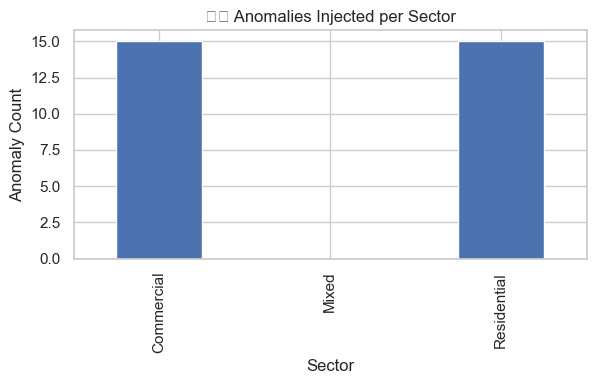

In [20]:
anomaly_counts = combined.groupby("sector")["anomaly_flag"].sum()
anomaly_counts.plot(kind="bar", figsize=(6,4), title="⚠️ Anomalies Injected per Sector")
plt.ylabel("Anomaly Count")
plt.xlabel("Sector")
plt.tight_layout()
plt.show()


Energy vs. Temperature Scatterplot

C:\Users\Mantas\AppData\Local\Temp\ipykernel_30840\1693430603.py:7: UserWarning: Glyph 127777 (\N{THERMOMETER}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Mantas\AppData\Local\Temp\ipykernel_30840\1693430603.py:7: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\Mantas\anaconda3\envs\energy_env\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127777 (\N{THERMOMETER}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Mantas\anaconda3\envs\energy_env\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


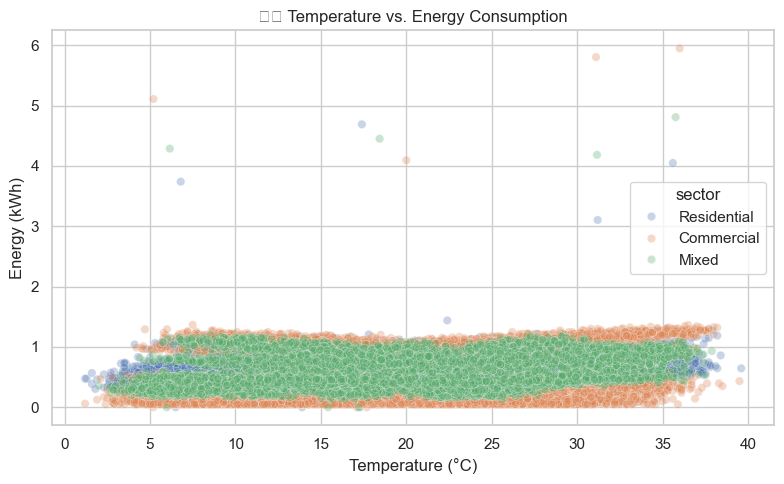

In [21]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=combined, x="temperature_C", y="energy_kWh", hue="sector", alpha=0.3)
plt.title("🌡️ Temperature vs. Energy Consumption")
plt.xlabel("Temperature (°C)")
plt.ylabel("Energy (kWh)")
plt.grid(True)
plt.tight_layout()
plt.show()


Carbon Footprint Over Time

C:\Users\Mantas\AppData\Local\Temp\ipykernel_30840\1042829112.py:9: UserWarning: Glyph 129518 (\N{ABACUS}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\Mantas\anaconda3\envs\energy_env\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129518 (\N{ABACUS}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


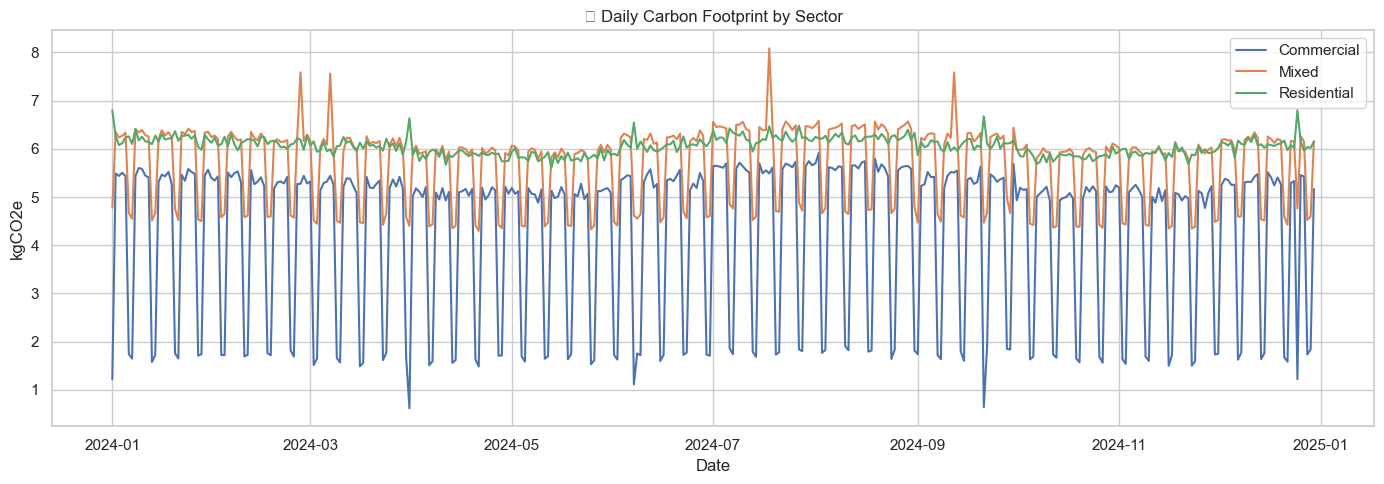

In [22]:
plt.figure(figsize=(14, 5))
for label, group in combined.groupby("sector"):
    group_daily = group.groupby(group['timestamp'].dt.date)["carbon_kgCO2e"].sum()
    plt.plot(group_daily.index, group_daily.values, label=label)
plt.title("🧮 Daily Carbon Footprint by Sector")
plt.ylabel("kgCO2e")
plt.xlabel("Date")
plt.legend()
plt.tight_layout()
plt.show()
